In [47]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud
import nltk

%matplotlib inline
import warnings
warnings.filterwarnings("ignore") 

# Trading on Sentiment

### Exploratory Data Analysis Notebook

Description of what I will do in this notebook

##### Import data.

In [48]:
data = pd.read_pickle('main_data/seperated_data.pkl')

In [49]:
# Reset the index in order to perform analysis 
data.reset_index(inplace=True)
data.rename(columns={'index': 'date'}, inplace=True)

# Breakdown of News Sources

We can see from this graph that overall, apple recieves positive news coverage. 

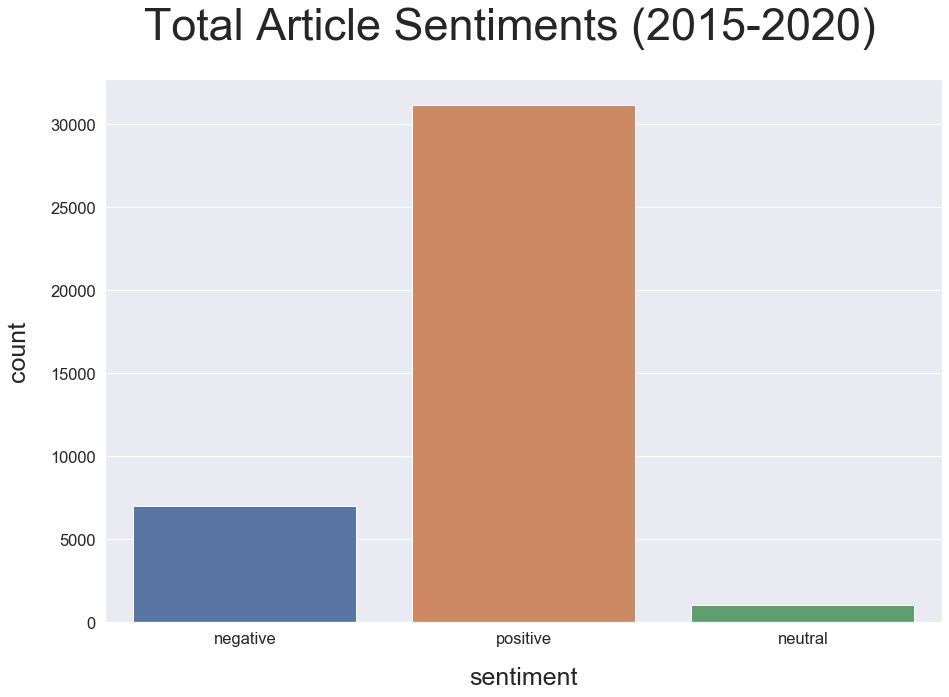

In [51]:
fig, ax = plt.subplots(figsize=(15,10))
fig.suptitle('Total Article Sentiments (2015-2020)', fontsize=45)
plt.xlabel('Sentiment', fontsize=25, labelpad=20)
plt.ylabel('Number of Articles', fontsize=25, labelpad=20)
sns.countplot('sentiment', data=data);
plt.savefig('total_article_breakdown.png')

In [6]:
# Now we can drop the sentiment string values from the main dataframe.
data.drop(['sentiment'], axis=1, inplace=True)

#### Which news outlets produce the most articles?

The graph below shows the distribution of news articles for the top 10 News Sources in the dataset. Sources were extracted from the article url's. Overall, we can see that there is a mix of American news outlets and international news publications in the case of ***ndtv***, ***hindustantimes*** and ***themalaymailonline***.

In [7]:
total_articles_per_outlet = data.groupby('news_outlet')['total_articles'].sum().nlargest(10)

In [8]:
outlet = total_articles_per_outlet.index.to_list()
total_stories = total_articles_per_outlet.values

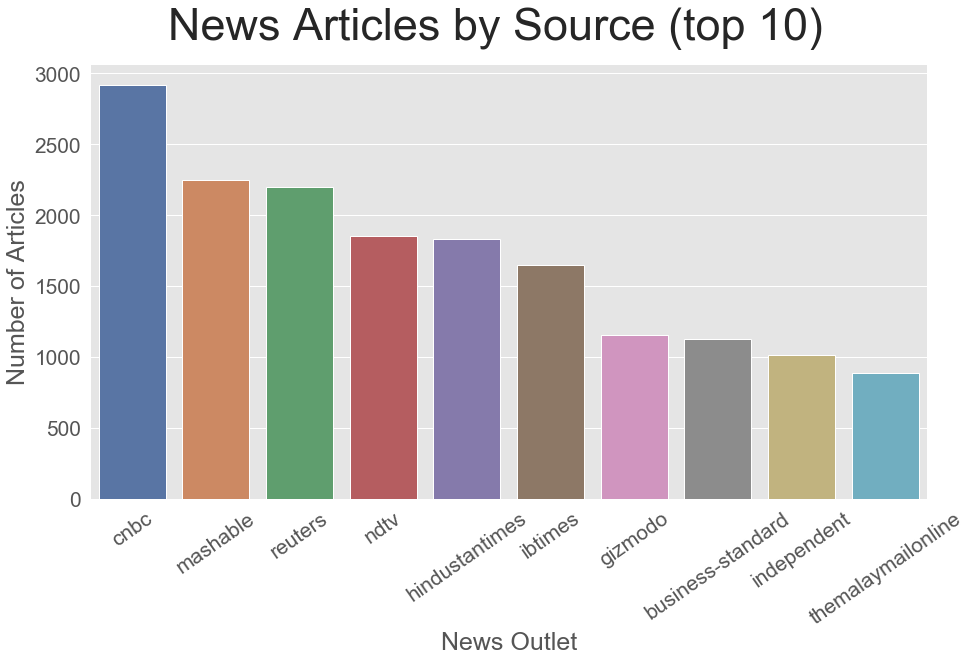

In [44]:
fig, ax = plt.subplots(figsize=(15,8))
plt.xticks(rotation=35)
sns.set(font_scale = 1.5)
sns.barplot(outlet, total_stories, ax=ax)
fig.suptitle('News Articles by Source (top 10)', fontsize=45)
plt.xlabel('News Outlet', fontsize=25)
plt.ylabel('Number of Articles', fontsize=25);
plt.show();
#plt.savefig('news_article_by_source.png');

#### Top 10 news outlets giving negative coverage

The graph below shows the distribution of positive and negative coverage among the news outlets with the highest amount of ****negative**** coverage. Interestingly, even though Reuters is the third largest source in terms of quantity, they take the top spot for negative coverage. 

In [10]:
negative_stories = data.groupby('news_outlet')['sent_negative'].sum().nlargest(10)
neg_df = pd.DataFrame(negative_stories)
neg_df.reset_index(inplace=True)

In [11]:
neg_df.news_outlet.to_list() #top negative news

['reuters',
 'cnbc',
 'ndtv',
 'hindustantimes',
 'mashable',
 'business-standard',
 'dailymail',
 'ibtimes',
 'gizmodo',
 'telegraph']

In [45]:
data.news_outlet.nunique()

445

In [12]:
#Isolate all of the news agencies into their own dataframe.
nega = data.loc[(data['news_outlet'] == 'reuters') |
        (data['news_outlet'] == 'cnbc') |
        (data['news_outlet'] == 'ndtv')|
        (data['news_outlet'] == 'hindustantimes')|
        (data['news_outlet'] == 'mashable')|
        (data['news_outlet'] == 'business-standard')|
        (data['news_outlet'] == 'dailymail')|
        (data['news_outlet'] == 'ibtimes')|
        (data['news_outlet'] == 'gizmodo')|
        (data['news_outlet'] == 'telegraph')]

In [13]:
positive_stories = nega.groupby('news_outlet')['sent_positive'].sum().nlargest(10)
pos_df = pd.DataFrame(positive_stories)
pos_df.reset_index(inplace=True)

In [14]:
neg_df

,news_outlet,sent_negative
0,reuters,546.0
1,cnbc,475.0
2,ndtv,369.0
3,hindustantimes,311.0
4,mashable,271.0
5,business-standard,252.0
6,dailymail,238.0
7,ibtimes,235.0
8,gizmodo,214.0
9,telegraph,191.0


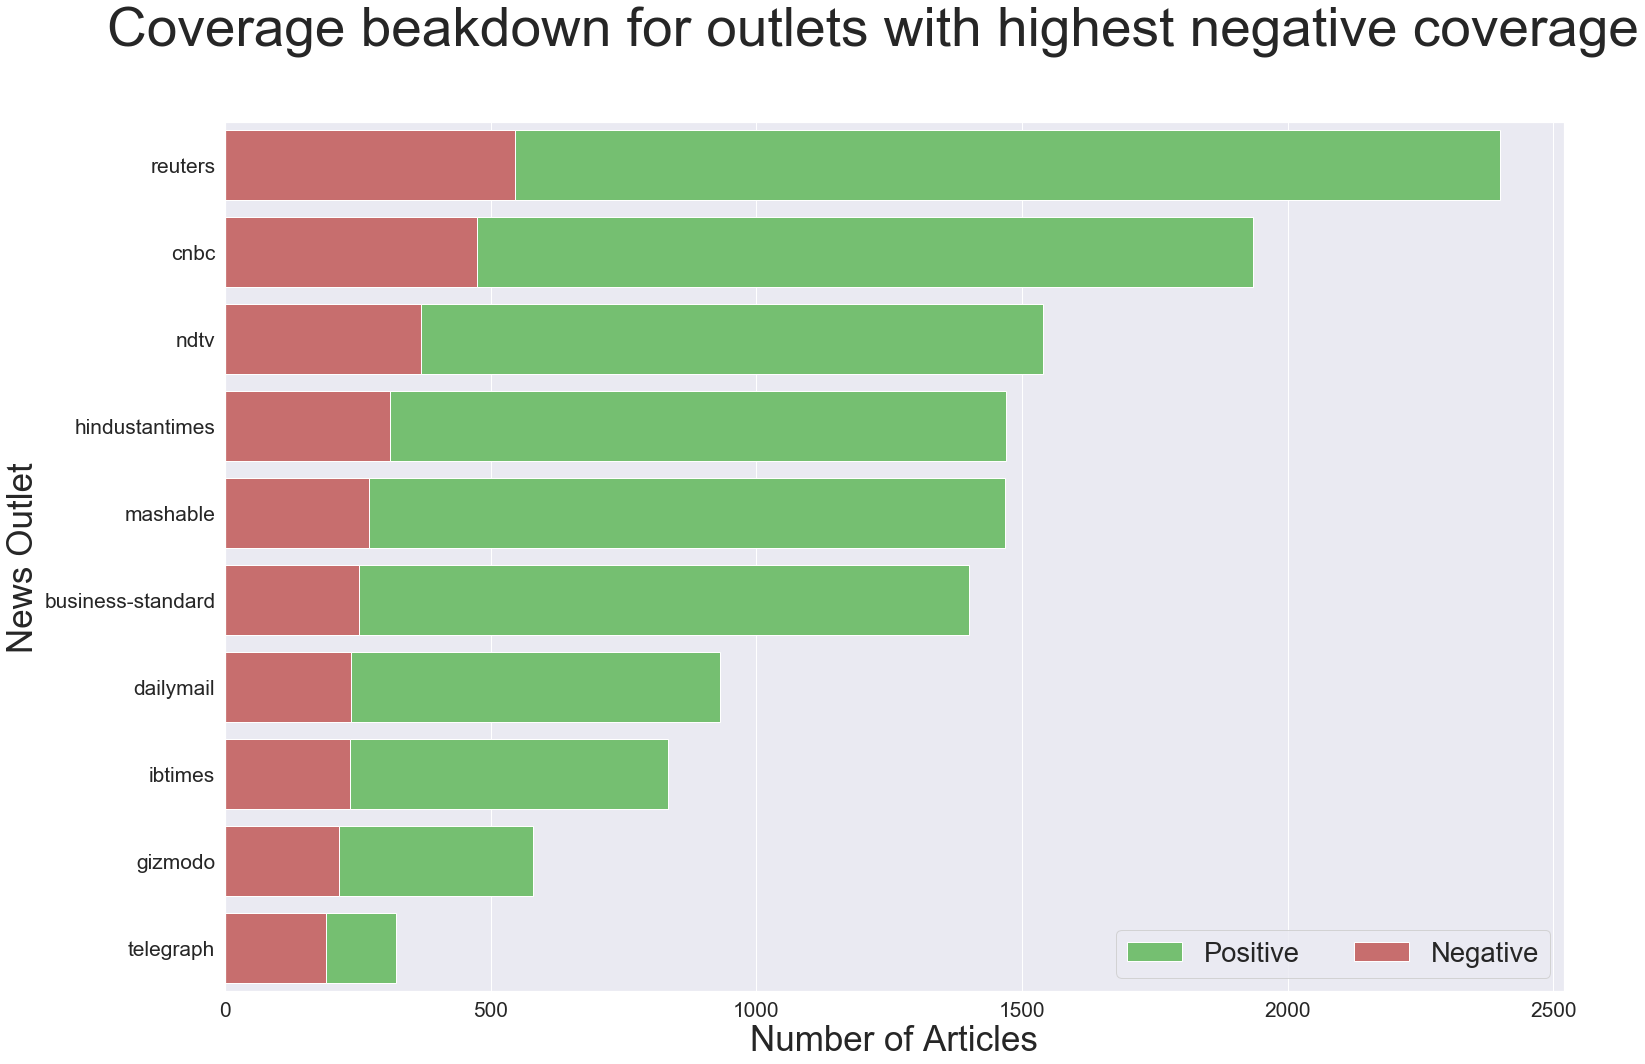

In [15]:
sns.set_context('paper')
sns.set(font_scale = 1.9)
fig, ax = plt.subplots(figsize = (24,16))
sns.set_color_codes('muted')
bar1 = sns.barplot(x = 'sent_positive', y = 'news_outlet', data = pos_df,
            label = 'Positive', color = 'g', edgecolor = 'w')
sns.set_color_codes('muted')
bar2 = sns.barplot(x = 'sent_negative', y = 'news_outlet', data = neg_df,
            label = 'Negative', color = 'r', edgecolor = 'w')
ax.legend(ncol = 2, loc = 'lower right', fontsize='large')
fig.suptitle('Coverage beakdown for outlets with highest negative coverage', fontsize=55)
plt.ylabel('News Outlet', fontsize=35)
plt.xlabel('Number of Articles', fontsize=35);
plt.show()

#### Top 10 news outlets giving positive coverage

This graph is similar to the graph above, however it shows the distribution of positive and negative coverage among the news outlets with the highest amount of ****positive**** coverage. The bottom of this graph is the most informative, showing that BGR and Independent produce overwhelmingly positive news. 

In [16]:
positive_stories = data.groupby('news_outlet')['sent_positive'].sum().nlargest(10)
pos_df = pd.DataFrame(positive_stories)
pos_df.reset_index(inplace=True)

In [17]:
pos_df.news_outlet.to_list() #top positive news

['cnbc',
 'mashable',
 'reuters',
 'ndtv',
 'hindustantimes',
 'ibtimes',
 'gizmodo',
 'independent',
 'business-standard',
 'bgr']

In [18]:
#Isolate all of the news agencies into their own dataframe. 
posa = data.loc[(data['news_outlet'] == 'cnbc') |
        (data['news_outlet'] == 'mashable') |
        (data['news_outlet'] == 'reuters')|
        (data['news_outlet'] == 'hindustantimes')|
        (data['news_outlet'] == 'ndtv')|
        (data['news_outlet'] == 'ibtimes')|
        (data['news_outlet'] == 'gizmodo')|
        (data['news_outlet'] == 'independent')|
        (data['news_outlet'] == 'business-standard')|
        (data['news_outlet'] == 'bgr')]

In [19]:
negative_stories = posa.groupby('news_outlet')['sent_negative'].sum().nlargest(10)
neg_df = pd.DataFrame(negative_stories)
neg_df.reset_index(inplace=True)

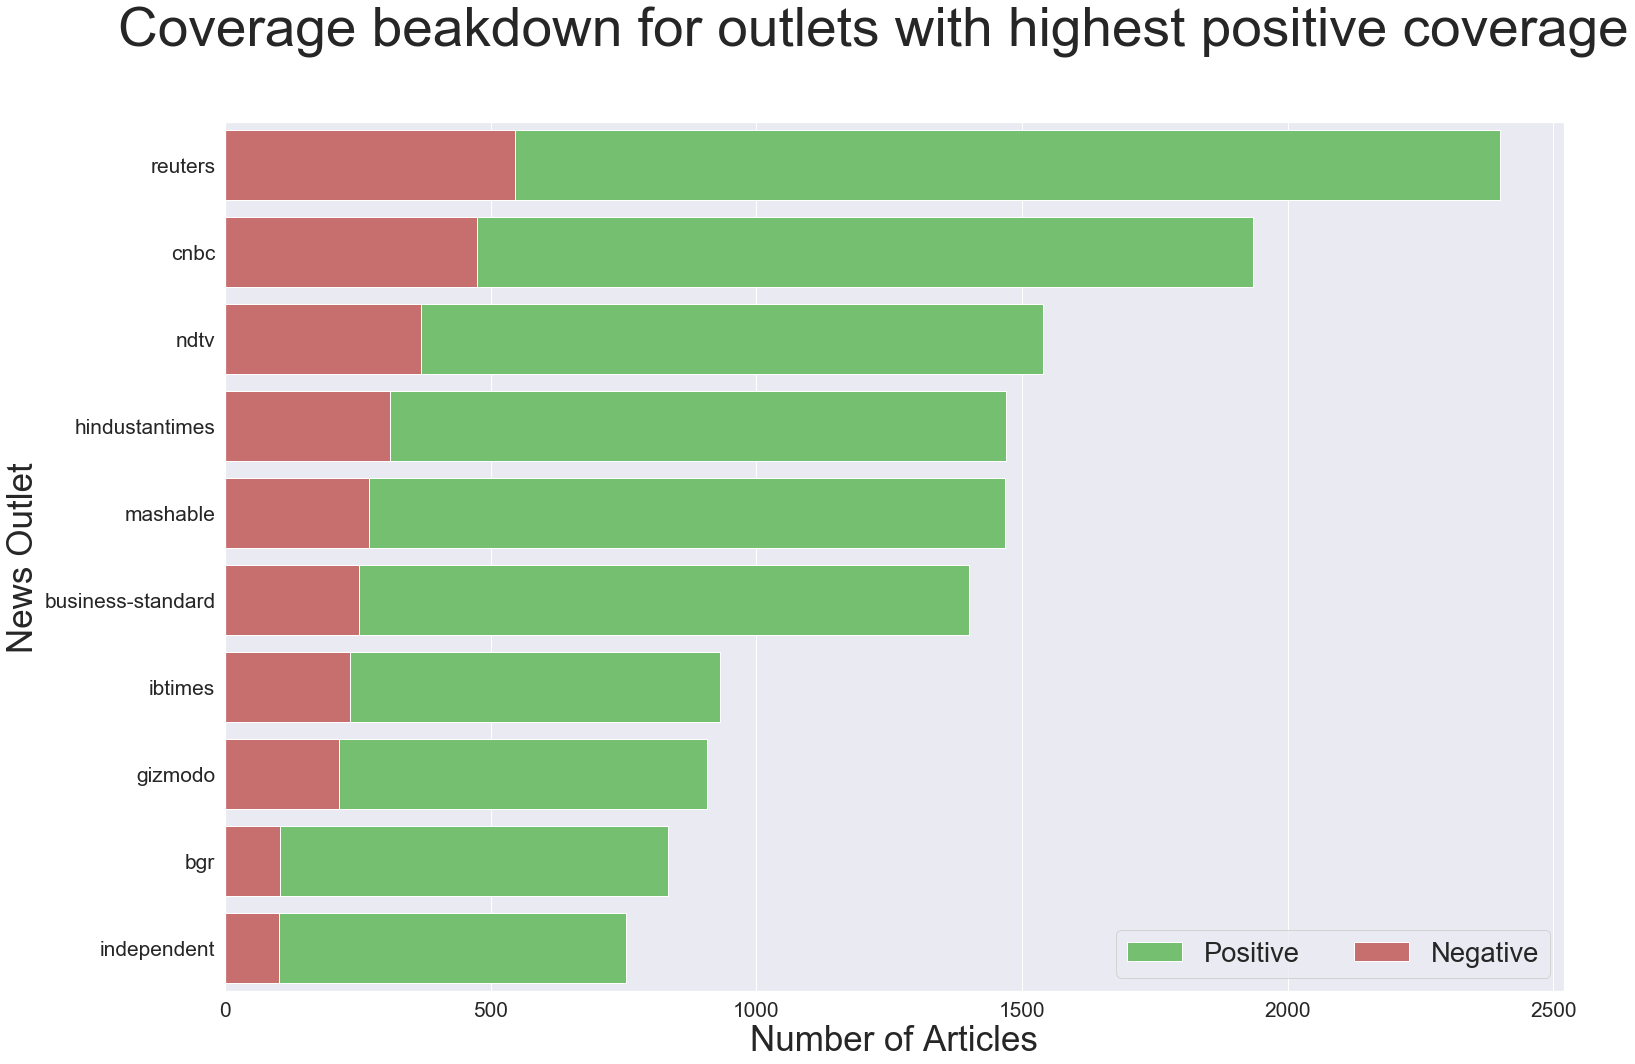

In [20]:
sns.set_context('paper')
sns.set(font_scale = 1.9)
fig, ax = plt.subplots(figsize = (24,16))
sns.set_color_codes('muted')
bar1 = sns.barplot(x = 'sent_positive', y = 'news_outlet', data = pos_df,
            label = 'Positive', color = 'g', edgecolor = 'w')
sns.set_color_codes('muted')
bar2 = sns.barplot(x = 'sent_negative', y = 'news_outlet', data = neg_df,
            label = 'Negative', color = 'r', edgecolor = 'w')
ax.legend(ncol = 2, loc = 'lower right', fontsize='large')
fig.suptitle('Coverage beakdown for outlets with highest positive coverage', fontsize=55)
plt.ylabel('News Outlet', fontsize=35)
plt.xlabel('Number of Articles', fontsize=35);
plt.show()

# Analysis of Price vs. Sentiment over time.

In [21]:
targs = pd.read_pickle('main_data/maindf.pkl')

Create a rolling window to visualize the time series trends.

In [22]:
roll_mean = targs.rolling(window=30).mean()

In [23]:
roll_mean.dropna(inplace=True)

/Users/brendanferris/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/pandas/plotting/_matplotlib/converter.py:103: FutureWarning: Using an implicitly registered datetime converter for a matplotlib plotting method. The converter was registered by pandas on import. Future versions of pandas will require you to explicitly register matplotlib converters.

To register the converters:
	>>> from pandas.plotting import register_matplotlib_converters
	>>> register_matplotlib_converters()
  warnings.warn(msg, FutureWarning)


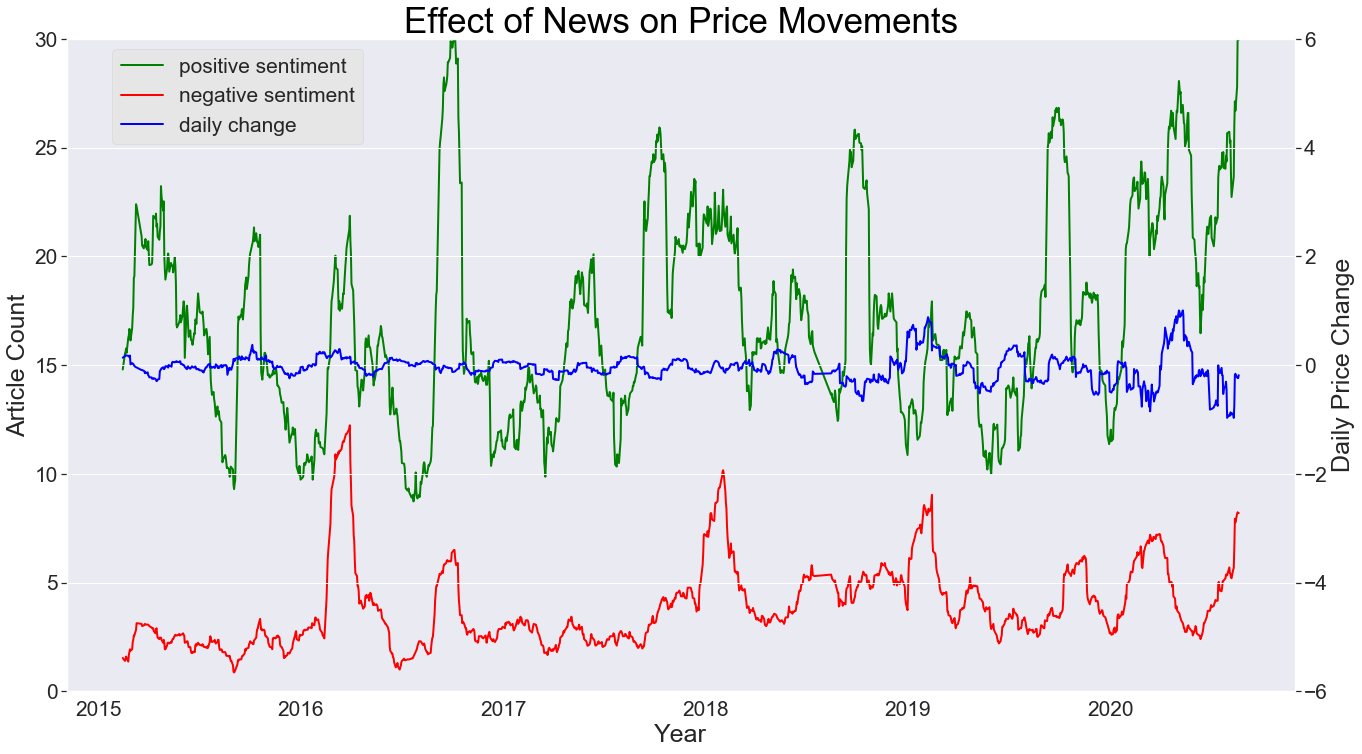

In [24]:
fig, ax = plt.subplots(figsize=(22,12))
ax2 = ax.twinx()
sns.set(font_scale = 1.9)
plt.style.use('ggplot')
ax.plot(roll_mean.sent_positive, lw=2, color='green', label='positive sentiment')
ax.plot(roll_mean.sent_negative, lw=2, color='red', label='negative sentiment')
ax.set_ylabel('Article Count', fontsize=25)
ax.set_xlabel('Year', fontsize=25)
ax.set_ylim([0,30])

ax2.plot(roll_mean.day_change, lw=2, color='blue',label='daily change');
ax2.set_ylim([-6,6])
ax.grid(False)

ax2.set_ylabel('Daily Price Change', fontsize=25)
plt.title("Effect of News on Price Movements", fontsize=35,color='black')
#Need anchor and transform to incorperate both x axes legends. Otherwise they are seperate.
fig.legend(loc='upper right', bbox_to_anchor=(.25,1), bbox_transform=ax.transAxes);

#plt.savefig('images/effect_of_news_on_price.png');

## Zooming in on interesting time windows

#### Early 2020: Coronavirus Pandemic

We can see from the graph that the Coronavirus pandemic had the most drastic effect on daily price movements over the last 5 years. We can see that currently we are in period of wild price movements in both directions. 

In [25]:
early_2020 = targs['2020-1-01':'2020-5-13']
negative_2020 = early_2020.loc[early_2020['sent_negative'] == 1]
positive_2020 = early_2020.loc[early_2020['sent_positive'] == 1]

In [26]:
negative_text_2020 = negative_2020.tokens
neg_text_bag_2020 = " ".join(article for article in negative_text_2020)

positive_text_2020 = positive_2020.tokens
pos_text_bag_2020 = " ".join(article for article in positive_text_2020)

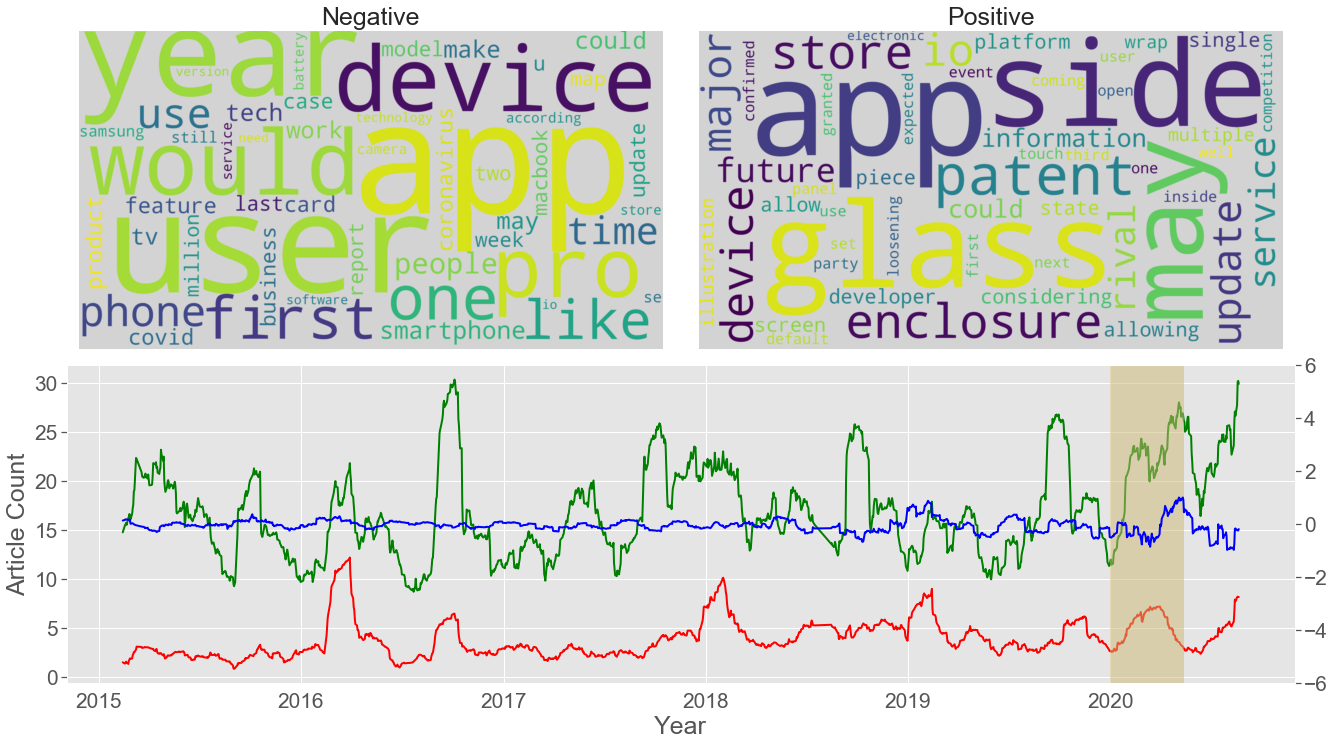

In [27]:
stopwords = ['apple', 'iphone', 'ipad', 'watch', 'company', 'said', 'iphones']

fig, ax = plt.subplots(figsize=(22,12))
plt.subplots_adjust(hspace=.05, wspace=.02)
sns.set(font_scale = 1.9)
plt.style.use('ggplot')

#Sentiment Plot
ax1 = plt.subplot(212)
ax4 = ax1.twinx() # daily change line.
ax1.plot(roll_mean.sent_positive, lw=2, color='green', label='positive sentiment')
ax1.plot(roll_mean.sent_negative, lw=2, color='red', label='negative sentiment')
ax1.set_ylabel('Article Count', fontsize=25)
ax1.set_xlabel('Year', fontsize=25)
plt.axvspan(pd.Timestamp('2020-1-01'), pd.Timestamp('2020-5-13'), color='y', alpha=0.5, lw=0) #highlight area of interest.

# twin X axis daily change line
ax4.plot(roll_mean.day_change, lw=2, color='blue',label='daily change');
ax4.set_ylim([-6,6])
ax4.grid(False)

#Positive WordCloud
ax2 = plt.subplot(222)
ax2.set_title('Positive', fontsize=25)
wordcloud = WordCloud(max_words=50,collocations=False, width=5500, height=3000, background_color="lightgrey", colormap='viridis', stopwords=stopwords).generate(pos_text_bag_2020)
ax2.imshow(wordcloud, interpolation='bilinear')
ax2.axis("off")

#Negative WordCloud
ax3 = plt.subplot(221)
ax3.set_title('Negative', fontsize=25)
wordcloud = WordCloud(max_words=50,collocations=False, width=5500, height=3000, background_color="lightgrey", colormap='viridis', stopwords=stopwords).generate(neg_text_bag_2020)
ax3.imshow(wordcloud, interpolation='bilinear')
ax3.axis("off");

#plt.savefig('images/early_2020_article_analysis.png');

#### Early 2018: Battery/Speed Throttling Controversy 

Wordclouds of the news articles of both positive and negative sentiment articles from the beginning of 2018 show that returns were negatively affected by two major scandals. Apple was accused of throttling phone speeds on older phones, leading to government probes in europe discussing [planned obscelesence](https://en.wikipedia.org/wiki/Planned_obsolescence). Additionally, iPhone users began to report that their phones batteries were exploding, which led Apple to announce [they would replace](https://support.apple.com/iphone/repair/service/battery-power) batteries on phones that may have the defect. During this period, Apple also released the HomePod, to mixed reviews. We can see that in this case, investors acted on the news of recalls and possible government intervention. 

In [28]:
early_2018 = targs['2017-12-29':'2018-2-28']
negative_2018 = early_2018.loc[early_2018['sent_negative'] == 1]
positive_2018 = early_2018.loc[early_2018['sent_positive'] == 1]

In [29]:
negative_text_2018 = negative_2018.tokens
neg_text_bag_2018 = " ".join(article for article in negative_text_2018)

positive_text_2018 = positive_2018.tokens
pos_text_bag_2018 = " ".join(article for article in positive_text_2018)

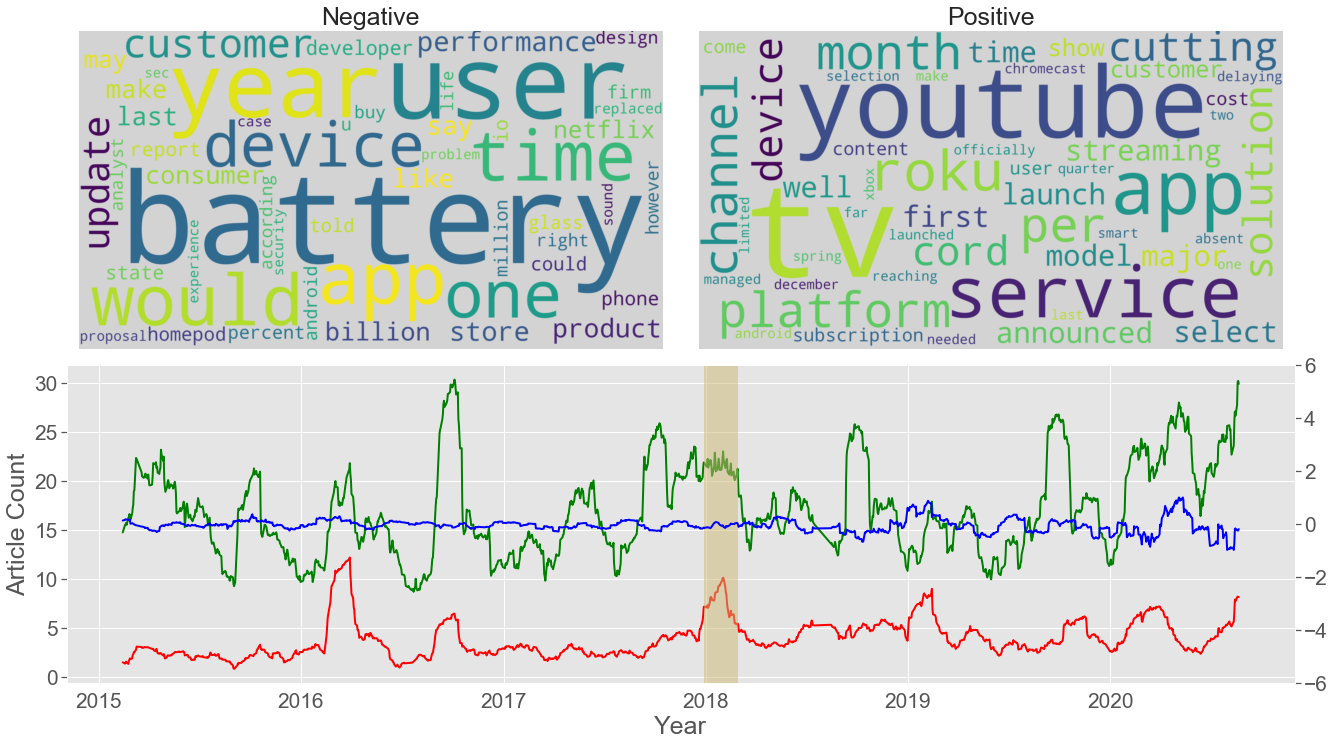

In [30]:

fig, ax = plt.subplots(figsize=(22,12))
plt.subplots_adjust(hspace=.05, wspace=.02)
sns.set(font_scale = 1.9)
plt.style.use('ggplot')

#Sentiment Plot
ax1 = plt.subplot(212)
ax4 = ax1.twinx() # daily change line.
ax1.plot(roll_mean.sent_positive, lw=2, color='green', label='positive sentiment')
ax1.plot(roll_mean.sent_negative, lw=2, color='red', label='negative sentiment')
ax1.set_ylabel('Article Count', fontsize=25)
ax1.set_xlabel('Year', fontsize=25)
plt.axvspan(pd.Timestamp('2017-12-29'), pd.Timestamp('2018-2-28'), color='y', alpha=0.5, lw=0) #Highlight area of interest.

# twin X axis daily change line
ax4.plot(roll_mean.day_change, lw=2, color='blue',label='daily change');
ax4.set_ylim([-6,6])
ax4.grid(False)

#Positive WordCloud
ax2 = plt.subplot(222)
ax2.set_title('Positive', fontsize=25)
wordcloud = WordCloud(max_words=50,collocations=False, width=5500, height=3000, background_color="lightgrey", colormap='viridis', stopwords=stopwords).generate(pos_text_bag_2018)
ax2.imshow(wordcloud, interpolation='bilinear')
ax2.axis("off")

#Negative WordCloud
ax3 = plt.subplot(221)
ax3.set_title('Negative', fontsize=25)
wordcloud = WordCloud(max_words=50,collocations=False, width=5500, height=3000, background_color="lightgrey", colormap='viridis', stopwords=stopwords).generate(neg_text_bag_2018)
ax3.imshow(wordcloud, interpolation='bilinear')
ax3.axis("off");

#plt.savefig('images/early_2018_article_analysis.png');

#### Early 2016: strong negative sentiment yet no affect on price.

Late 2016 brought news of Apple parking shielding corporate profits in ireland, through as scheme known as the ['Double Irish'](https://en.wikipedia.org/wiki/Double_Irish_arrangement). Despite being [ordered to pay](https://www.dw.com/en/juncker-says-apple-ruling-not-meant-to-attack-the-usa/a-19525846) billions in fines, stock prices were not effected. In fact, it seems that the dominant sentiment was positive during this period, with only a slight negative bump.

In [41]:
#Index the time period in question (Early 2016), and then take out both
# the positive and negative articles.

early_2016 = targs['2016-8-20':'2016-10-29']
negative_2016 = early_2016.loc[early_2016['sent_negative'] == 1]
positive_2016 = early_2016.loc[early_2016['sent_positive'] == 1]

In [42]:
negative_text_2016 = negative_2016.tokens
neg_text_bag_2016 = " ".join(article for article in negative_text_2016)

positive_text_2016 = positive_2016.tokens
pos_text_bag_2016 = " ".join(article for article in positive_text_2016)

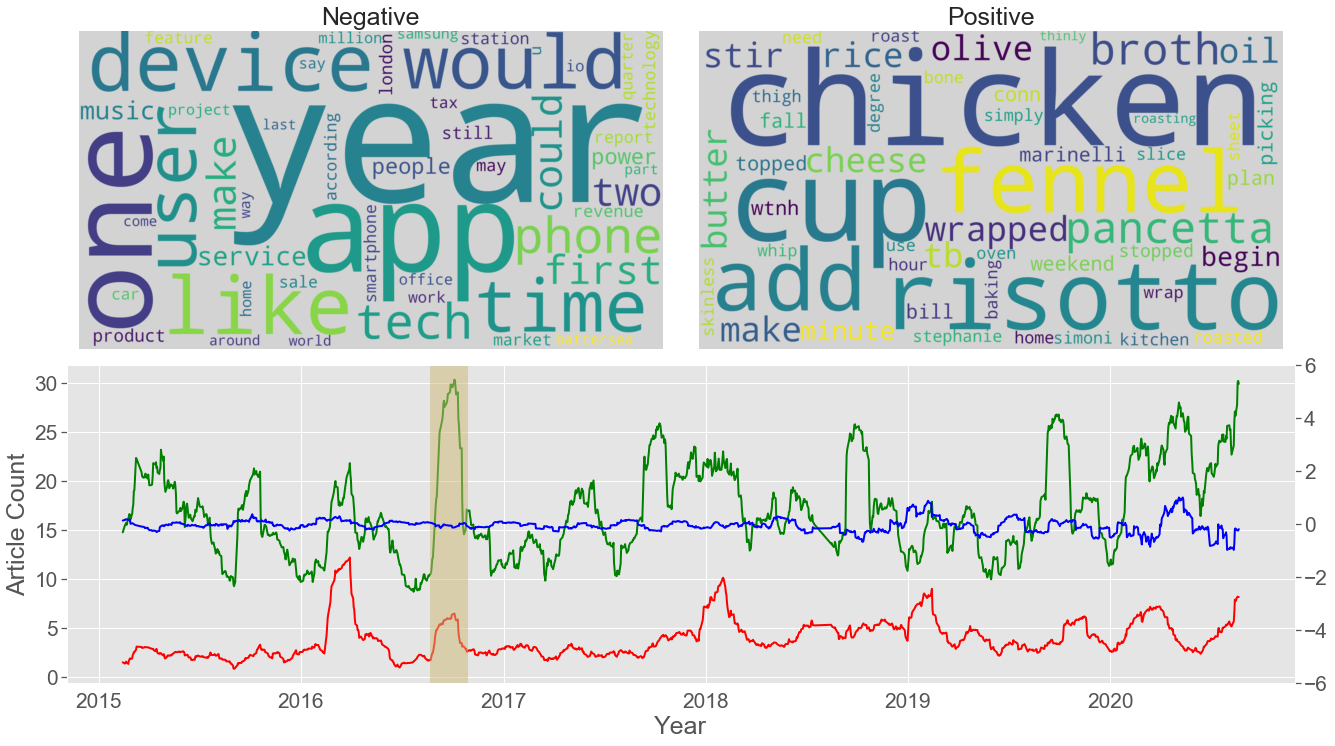

In [43]:
fig, ax = plt.subplots(figsize=(22,12))
plt.subplots_adjust(hspace=.05, wspace=.02)
sns.set(font_scale = 1.9)
plt.style.use('ggplot')

#Sentiment Plot
ax1 = plt.subplot(212)
ax4 = ax1.twinx() # daily change line.
ax1.plot(roll_mean.sent_positive, lw=2, color='green', label='positive sentiment')
ax1.plot(roll_mean.sent_negative, lw=2, color='red', label='negative sentiment')
ax1.set_ylabel('Article Count', fontsize=25)
ax1.set_xlabel('Year', fontsize=25)
plt.axvspan(pd.Timestamp('2016-8-20'), pd.Timestamp('2016-10-29'), color='y', alpha=0.5, lw=0)#Highlight area of interest.

# twin X axis daily change line
ax4.plot(roll_mean.day_change, lw=2, color='blue',label='daily change');
ax4.set_ylim([-6,6])
ax4.grid(False)

#Positive WordCloud
ax2 = plt.subplot(222)
ax2.set_title('Positive', fontsize=25)
wordcloud = WordCloud(max_words=50,collocations=False, width=5500, height=3000, background_color="lightgrey", colormap='viridis', stopwords=stopwords).generate(pos_text_bag_2016)
ax2.imshow(wordcloud, interpolation='bilinear')
ax2.axis("off")

#Negative WordCloud
ax3 = plt.subplot(221)
ax3.set_title('Negative', fontsize=25)
wordcloud = WordCloud(max_words=50,collocations=False, width=5500, height=3000, background_color="lightgrey", colormap='viridis', stopwords=stopwords).generate(neg_text_bag_2016)
ax3.imshow(wordcloud, interpolation='bilinear')
ax3.axis("off");

#plt.savefig('images/late_2016_article_analysis.png');

# Conclusions

From the above analysis we have seen that modeling news articles will be a difficult task. Short-term price fluctuations are fairly steady, except for the 2020 Coronavirus Pandemic. This steady trend is present even though coverage flutuates in both positive and negative directions. 